In [1]:
import numpy as np
import pandas as pd
import urllib.request as requests
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import unicodedata
import regex as re
from pyvi import ViTokenizer, ViPosTagger

In [2]:
data = pd.read_csv('news_politics_final.csv')
data

,Unnamed: 0,Content,label,Content_processed,LengthContent,LengthContent_processed
0,0,Dân trí trân trọng giới thiệu toàn văn Tuyên ...,real,dân_trí trân_trọng giới_thiệu toàn_văn tuyên_b...,6099,2473
1,1,Tổng Bí thư Nguyễn Phú Trọng hội kiến Chủ tị...,real,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,689,272
2,2,Tổng Bí thư Nguyễn Phú Trọng hội kiến Chủ tị...,real,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,598,226
3,3,Thảo luận tại hội trường Quốc hội về dự thảo ...,real,thảo_luận hội_trường quốc_hội dự_thảo luật_phò...,656,226
4,4,Thường trực Ban Bí thư Võ Văn Thưởng hội đà...,real,thường_trực_ban_bí_thư võ_văn_thưởng hội_đàm ủ...,193,77
...,...,...,...,...,...,...
2087,2087,"Tờ The Guardian, ấn bản Úc, hôm chủ nhật 7 thá...",fake,tờ the_guardian ấn_bản úc hôm chủ_nhật tháng_s...,1420,457
2088,2088,"Quốc Hội Việt Nam hôm nay, 08/06/2020, với tỷ ...",fake,quốc_hội việt_nam hôm_nay tỷ_lệ biểu_quyết tán...,464,156
2089,2089,Hiến pháp ở điều 25 có nói người dân được quyề...,fake,hiến_pháp dân quyền tự_do báo_chí luật báo_chí...,505,197
2090,2090,Hai cuộc bắt giữ xảy ra cách nhau chỉ hai ngày...,fake,hai bắt_giữ xảy hai tổ_chức phóng_viên biên_gi...,681,252


In [3]:
def labels(x):
    if x == 'real':
        return 1
    return 0
data['label'] = data['label'].apply(lambda x: labels(x))
data

,Unnamed: 0,Content,label,Content_processed,LengthContent,LengthContent_processed
0,0,Dân trí trân trọng giới thiệu toàn văn Tuyên ...,1,dân_trí trân_trọng giới_thiệu toàn_văn tuyên_b...,6099,2473
1,1,Tổng Bí thư Nguyễn Phú Trọng hội kiến Chủ tị...,1,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,689,272
2,2,Tổng Bí thư Nguyễn Phú Trọng hội kiến Chủ tị...,1,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,598,226
3,3,Thảo luận tại hội trường Quốc hội về dự thảo ...,1,thảo_luận hội_trường quốc_hội dự_thảo luật_phò...,656,226
4,4,Thường trực Ban Bí thư Võ Văn Thưởng hội đà...,1,thường_trực_ban_bí_thư võ_văn_thưởng hội_đàm ủ...,193,77
...,...,...,...,...,...,...
2087,2087,"Tờ The Guardian, ấn bản Úc, hôm chủ nhật 7 thá...",0,tờ the_guardian ấn_bản úc hôm chủ_nhật tháng_s...,1420,457
2088,2088,"Quốc Hội Việt Nam hôm nay, 08/06/2020, với tỷ ...",0,quốc_hội việt_nam hôm_nay tỷ_lệ biểu_quyết tán...,464,156
2089,2089,Hiến pháp ở điều 25 có nói người dân được quyề...,0,hiến_pháp dân quyền tự_do báo_chí luật báo_chí...,505,197
2090,2090,Hai cuộc bắt giữ xảy ra cách nhau chỉ hai ngày...,0,hai bắt_giữ xảy hai tổ_chức phóng_viên biên_gi...,681,252


Text(0.5, 1.0, 'Count of label')

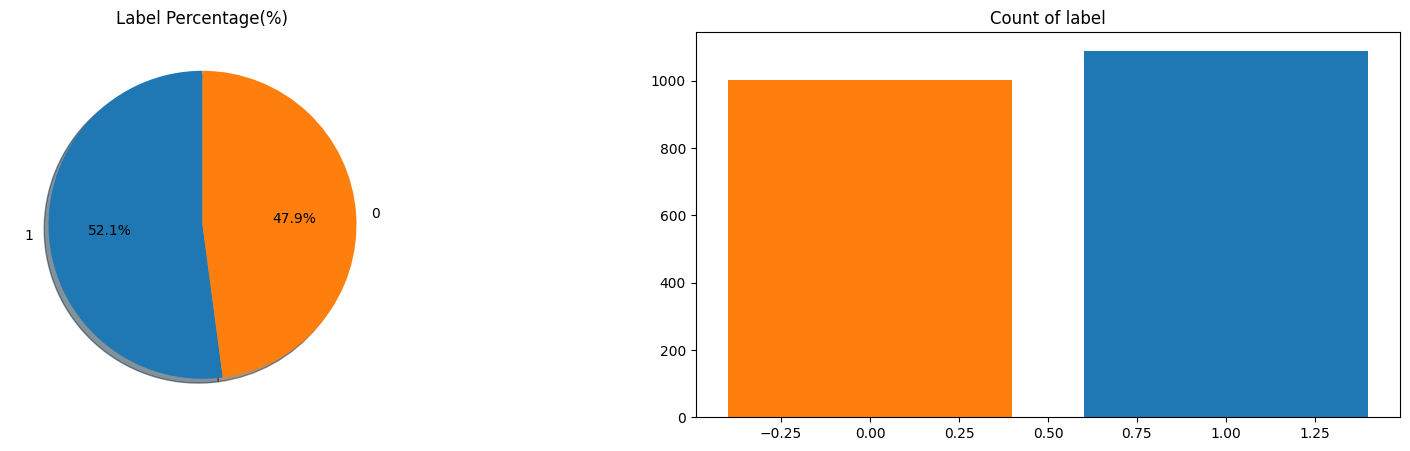

In [4]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,5))

labels = data['label'].value_counts().keys()
sizes = data['label'].value_counts()

axes[0].pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Label Percentage(%)')
axes[1].bar(labels, sizes, color=sns.color_palette())
axes[1].set_title('Count of label')

Pre Processing

Text(0.5, 1.0, 'Mean: 430')

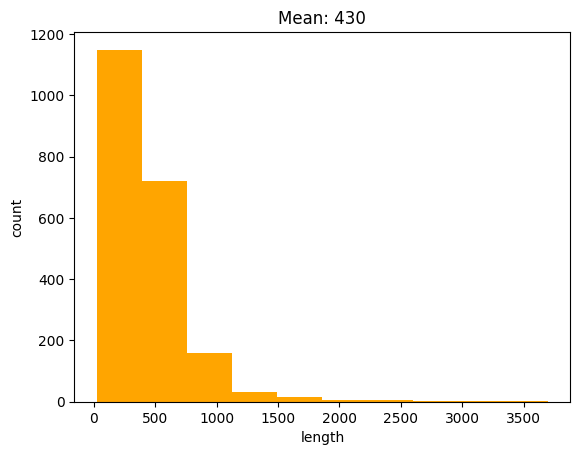

In [5]:
# Histogram
comment_len = [len(x.split()) for x in data['Content_processed']]

plt.hist(x=comment_len, color="orange")
plt.xlabel('length')
plt.ylabel('count')
plt.title(f'Mean: {np.mean(comment_len, dtype=np.int32)}')

In [6]:
# word cloud
def get_word_cloud(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    word_cloud = WordCloud(background_color=color, width=2500, height=2000).generate(cleaned_word)
    return word_cloud
comment_word_cloud = get_word_cloud(data['Content_processed'])


Text(0.5, 1.0, 'word cloud')

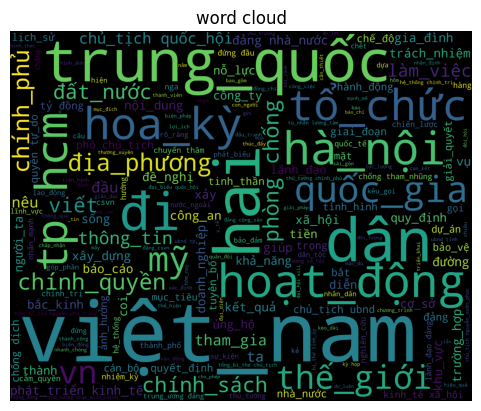

In [7]:
plt.imshow(comment_word_cloud)
plt.axis('off')
plt.title('word cloud')

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten, Bidirectional, SimpleRNN,Dropout
from sklearn.model_selection import train_test_split
from keras import backend as K
import keras

In [9]:
vocab_size = 10000
embedding_dim = 64
max_length = 600

sequences = data.Content_processed
labels = data.label

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(sequences)

In [10]:
X_train, X_test, train_labels, test_labels = train_test_split(sequences, labels, test_size = 0.3, random_state = 42)

In [11]:
train_sequences = tokenizer.texts_to_sequences(X_train)
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length, truncating='post', padding='post')

test_sequences = tokenizer.texts_to_sequences(X_test)
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length, truncating='post', padding='post')

Model: BiLSTM

In [12]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 64)           640000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 665,889
Trainable params: 665,889
Non-trainable params: 0
_________________________________________________________________


In [13]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Learning rate default:", model.optimizer.learning_rate.numpy())
K.set_value(model.optimizer.learning_rate, 0.0005)
print("Learning rate before second fit:", model.optimizer.learning_rate.numpy())

Learning rate default: 0.001
Learning rate before second fit: 0.0005


In [14]:

history = model.fit(padded_train_sequences, train_labels, batch_size=1024, epochs=45, validation_split=0.1, 
                      verbose=1, validation_data=(padded_test_sequences, test_labels))

Epoch 1/45
2/2 [==============================] - 15s 7s/step - loss: 0.6945 - accuracy: 0.4249 - val_loss: 0.6927 - val_accuracy: 0.5557
Epoch 2/45
2/2 [==============================] - 14s 7s/step - loss: 0.6919 - accuracy: 0.5943 - val_loss: 0.6907 - val_accuracy: 0.6099
Epoch 3/45
2/2 [==============================] - 15s 8s/step - loss: 0.6899 - accuracy: 0.6325 - val_loss: 0.6887 - val_accuracy: 0.6433
Epoch 4/45
2/2 [==============================] - 16s 8s/step - loss: 0.6876 - accuracy: 0.6619 - val_loss: 0.6865 - val_accuracy: 0.6720
Epoch 5/45
2/2 [==============================] - 15s 8s/step - loss: 0.6850 - accuracy: 0.6960 - val_loss: 0.6841 - val_accuracy: 0.6927
Epoch 6/45
2/2 [==============================] - 16s 8s/step - loss: 0.6821 - accuracy: 0.7377 - val_loss: 0.6814 - val_accuracy: 0.7054
Epoch 7/45
2/2 [==============================] - 16s 8s/step - loss: 0.6787 - accuracy: 0.7630 - val_loss: 0.6783 - val_accuracy: 0.7213
Epoch 8/45
2/2 [==================

1/1 [==============================] - 2s 2s/step


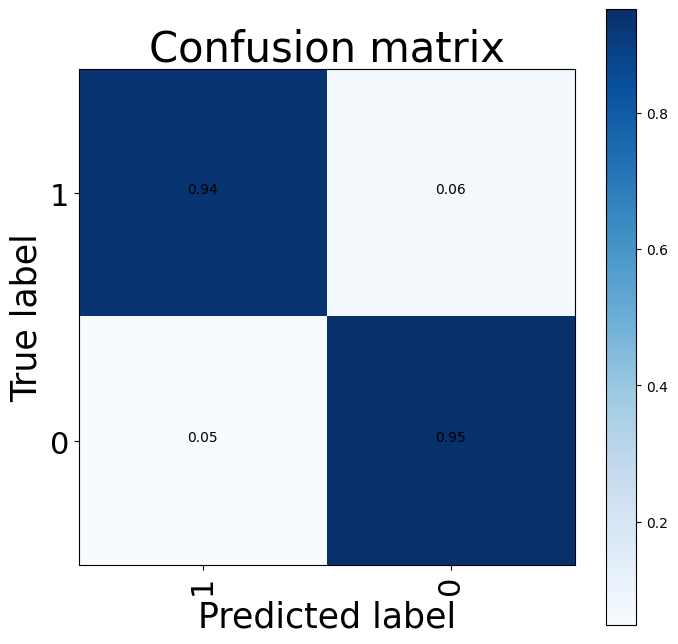

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

def decode_sentiment(score):
    return 0 if score < 0.5 else 1

y_pred = []
y_test = list(test_labels)
scores = model.predict(padded_test_sequences, verbose=1, batch_size=8000)

y_pred = [decode_sentiment(score) for score in scores]
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center",color="black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=data.label.unique(), title="Confusion matrix")
plt.show()

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       294
           1       0.94      0.95      0.95       334

    accuracy                           0.94       628
   macro avg       0.94      0.94      0.94       628
weighted avg       0.94      0.94      0.94       628



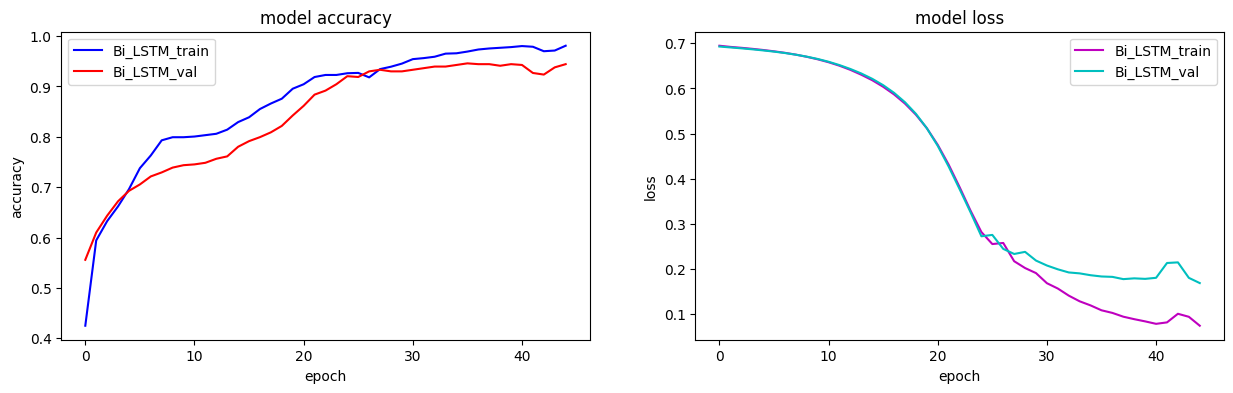

In [17]:
s, (at, al) = plt.subplots(1, 2, figsize=(15,4))
at.plot(history.history['accuracy'], c= 'b', label='Bi_LSTM_train')
at.plot(history.history['val_accuracy'], c='r', label='Bi_LSTM_val')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend()

al.plot(history.history['loss'], c='m', label='Bi_LSTM_train')
al.plot(history.history['val_loss'], c='c', label='Bi_LSTM_val')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend()

In [18]:
model.save("LSTM_model.h5")
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)



In [21]:
from keras.models import load_model
model_LSTM = load_model('LSTM_model.h5')
model_LSTM.predict(padded_test_sequences)

20/20 [==============================] - 2s 43ms/step


array([[0.01539517],
       [0.852812  ],
       [0.9678837 ],
       [0.02300428],
       [0.9160069 ],
       [0.9229241 ],
       [0.03864493],
       [0.9593879 ],
       [0.96212924],
       [0.03067702],
       [0.0201524 ],
       [0.93479353],
       [0.9602582 ],
       [0.02363396],
       [0.9396314 ],
       [0.05105701],
       [0.9253904 ],
       [0.852275  ],
       [0.02910307],
       [0.06193727],
       [0.02099184],
       [0.01379361],
       [0.01921827],
       [0.02436792],
       [0.02578978],
       [0.96422243],
       [0.9640452 ],
       [0.95841014],
       [0.02559818],
       [0.950279  ],
       [0.01435887],
       [0.01131888],
       [0.9416349 ],
       [0.04344062],
       [0.01530493],
       [0.96964544],
       [0.22412494],
       [0.01136197],
       [0.9322692 ],
       [0.02102002],
       [0.9556514 ],
       [0.95795894],
       [0.8687387 ],
       [0.9812655 ],
       [0.01577503],
       [0.0196789 ],
       [0.9711067 ],
       [0.927